In [6]:
%pip install qiskit
%pip install pylatexenc
%pip install qiskit-aer
%pip install qiskit-ibm-provider
%pip install --upgrade torch torchvision
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install -U qiskit qiskit-ibm-runtime


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgr

## Importare fake machines


In [11]:
import numpy as np
import random
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os
import json

# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
#from qiskit_ibm_provider import IBMProvider

plt.rcParams.update({'font.size': 14, 'font.family': 'serif', 'mathtext.fontset': 'dejavuserif'})

ImportError: cannot import name 'convert_to_target' from 'qiskit.providers' (/Users/lucaboffa/Desktop/Tesi/envTesi/lib/python3.11/site-packages/qiskit/providers/__init__.py)

In [8]:
def normalized_fractional_hamming_intradistance(dict1, dict2):
    # Verifica se i dizionari hanno le stesse chiavi
    if set(dict1.keys()) != set(dict2.keys()):
        raise ValueError("Response must have the same lenght")
    # Calcola la somma delle differenze assolute tra i valori corrispondenti
    sum_diff = sum(abs((dict1[key] - dict2[key])) for key in dict1.keys())
    fractional_hamming_distance = sum_diff / 2 #len(dict1) perchè la somma ha come range [0,2] quindi /2 per normalizzare a range [0,1]
    return fractional_hamming_distance

## Token API IBM
Inserire il proprio token per utilizzare le macchine

In [9]:
service = QiskitRuntimeService(channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='ae0af2c735f631d165a0a0f4270fcf79bed032b916448b9345d2854cb124c7aa807e3e99674a758487949d3489f837fd658a37ac6361b4e53a27dba92482dfcc')
# IBM Quantum channel; set to default

# Mostro i backend disponibili per l'esecuzione
print(service.backends())

backend_maps = {
    index: backend.name.split('_')[1] for index, backend in enumerate(service.backends())
}

# Visualizo che i nomi siano corretti 
print(backend_maps)

# Inizializzo il backend array 
backend_array=[]
backend_map = backend_map = {index: backend.name.split('_')[1] for index, backend in enumerate(service.backends(operational=True, simulator=False))}

print("Macchine disponibili:")
for index, name in backend_map.items():
    print(f"{index}: {name}")
    
scelta = input("Scegli un'opzione (1/2): 1 tutte, 2 scegli manualmente ")

# Esegui un'azione in base alla scelta   
if scelta == "1":
    print("Hai scelto l'opzione 1!")
    for _, name in backend_maps.items():
            class_name = f"ibm_{name}"  
            try:
                backend_array.append(service.backend(class_name, instance='ibm-q/open/main'))
            except KeyError:
                print(f"Error: Class '{class_name}' not found in qiskit.test.mock.")
    backend_map = {
        index: backend.name.split('_')[1] for index, backend in enumerate(backend_array)
    }
    print(backend_array)
    print(backend_map)
elif scelta == "2":
    print("Hai scelto l'opzione 2!")
    scelte_utente = input("Inserisci gli indici delle macchine separate da una virgola: ")
    indici = [int(i.strip()) for i in scelte_utente.split(',') if i.strip().isdigit()]
    backend_array = []
    new_backend_map = {}
    for index in indici:
        if index in backend_map:
            class_name = f"ibm_{backend_map[index]}"
            try:
                backend = service.backend(class_name, instance='ibm-q/open/main')
                backend_array.append(backend)
                new_backend_map[len(new_backend_map)] = backend.name.split('_')[1]
            except Exception as e:
                print(f"Errore nel trovare la macchina '{class_name}': {e}")
    backend_map = new_backend_map
    print("Macchine selezionate:", [backend.name for backend in backend_array])
    print("Nuovo mapping aggiornato:", backend_map)
else:
    print("Scelta non valida!")

/var/folders/bw/ly64h2nn2wn0cmw3wfmjlq840000gn/T/ipykernel_49361/640824699.py:1: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService(channel='ibm_quantum',


[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>]
{0: 'brisbane', 1: 'sherbrooke'}
Macchine disponibili:
0: brisbane
1: sherbrooke
Hai scelto l'opzione 1!
[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>]
{0: 'brisbane', 1: 'sherbrooke'}


## Collegamento alle macchine IBM
Automatizzazo il processo di ottenimento delle 3 macchine gratuite disbonibili al momento

In [10]:
# Inizializzo il backend array 
backend_array=[]

service = QiskitRuntimeService()
 
for _, name in backend_map.items():
    class_name = f"ibm_{name}"  
    try:
        # Specify a QPU to use for the noise model
        real_backend = service.backend(class_name)
        backend_array.append(AerSimulator.from_backend(real_backend))
    except KeyError:
        print(f"Error: Class '{class_name}' not found in qiskit.test.mock.")

print(backend_array)

/var/folders/bw/ly64h2nn2wn0cmw3wfmjlq840000gn/T/ipykernel_49361/4051105688.py:4: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService()


NameError: name 'AerSimulator' is not defined

In [ ]:
import pickle
n_challenge = int(input("Inserisci il numero di challenge da utilizzare (10/20): "))
n_qubits = int(input("Inserisci il numero di QBITS: "))
shots= int(input("Inserisci il numero shots: "))
n_runs = int(input("Inserisci il numero di runs ")) # minimun 2 runs altrimenti instability non viene calcolata per come è stata pensata

# Loading from file (this is the only one file used for all the metrics)
file_name = f'./results/configuration_challenges/random_arrays_{n_challenge}.pkl'

if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
        a_challenge, b_challenge, c_challenge, d_challenge, e_challenge, f_challenge = pickle.load(f)
    print(f"Arrays loaded from '{file_name}'")
else:
    print(f"Error: File '{file_name}' not found.")

Arrays loaded from './results/configuration_challenges/random_arrays_10.pkl'


## Definizione del circuito

In [ ]:
def qcirc_venus(i):
    circuit = QuantumCircuit(n_qubits,n_qubits)
    for j in range(n_qubits):
        if j%2==0:
            circuit.ry(b_challenge[i][j],j)
            circuit.rz(a_challenge[i][j],j)
        else:
            circuit.ry(e_challenge[i][j],j)
            circuit.rz(d_challenge[i][j],j)

    for j in range(n_qubits -2,-1,-1):
        circuit.cx(j,j+1)

    for j in range(n_qubits):
        if j%2==0:
            circuit.ry(e_challenge[i][j],j)
            circuit.rz(d_challenge[i][j],j)
        else:
            circuit.ry(b_challenge[i][j],j)
            circuit.rz(a_challenge[i][j],j) 

    circuit.barrier()

    circuit.measure(range(n_qubits), range(n_qubits))
    name=f"./results/circuit/Venus_real_{n_qubits}_.png"
    circuit.draw('mpl',  filename=name)
    return circuit

'\ndef qcirc(i):\n  # Create a Quantum Circuit\n  circuit = QuantumCircuit(n_qubits, n_qubits)\n  #calcolo media response\n  for j in range(n_qubits):\n    if j%2==0:\n      circuit.rx(c_challenge[i][j],j)\n      circuit.ry(b_challenge[i][j],j)\n      circuit.rz(a_challenge[i][j],j)\n    else:\n      circuit.rx(f_challenge[i][j],j)\n      circuit.ry(e_challenge[i][j],j)\n      circuit.rz(d_challenge[i][j],j)\n      circuit.cz(j,j-1)\n\n  for j in range(1,n_qubits-1):\n    if j%2==1:\n      circuit.rx(c_challenge[i][j],j)\n      circuit.ry(b_challenge[i][j],j)\n      circuit.rz(a_challenge[i][j],j)\n    else:\n      circuit.rx(f_challenge[i][j],j)\n      circuit.ry(e_challenge[i][j],j)\n      circuit.rz(d_challenge[i][j],j)\n      circuit.cz(j,j-1)\n\n  circuit.barrier()\n  \n  for j in range(n_qubits):\n      if j%2==0:\n        circuit.rx(c_challenge[i][j],j)\n      else:\n        circuit.rx(f_challenge[i][j],j)\n\n  circuit.barrier()\n  circuit.measure(range(n_qubits), range(n_qubits

In [ ]:
def qcirc_mercury(i):
    circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Applicazione di rotazioni iniziali con Hadamard per maggiore superposizione
    for j in range(n_qubits):
        circuit.h(j)
        if j % 2 == 0:
            circuit.ry(b_challenge[i][j], j)
            circuit.rz(a_challenge[i][j], j)
        else:
            circuit.ry(e_challenge[i][j], j)
            circuit.rz(d_challenge[i][j], j)
    
    # Entanglement con CNOT e CZ per aumentare la distanza di Hamming
    for j in range(n_qubits - 2, -1, -1):
        circuit.cx(j, j + 1)
        circuit.cz(j, (j + 2) % n_qubits)
    
    circuit.barrier()
    
    # Ulteriori rotazioni per diversificare le misure
    for j in range(n_qubits):
        if j % 2 == 0:
            circuit.ry(e_challenge[i][j], j)
            circuit.rz(d_challenge[i][j], j)
        else:
            circuit.ry(b_challenge[i][j], j)
            circuit.rz(a_challenge[i][j], j)
            circuit.cz(j, (j - 1) % n_qubits)
    
    circuit.barrier()
    circuit.measure(range(n_qubits), range(n_qubits))
    
    name = f"./results/circuit/Mercury_real_{n_qubits}_.png"
    circuit.draw('mpl', filename=name)
    
    return circuit


In [ ]:
def qcirc_mars(i):
  # Create a Quantum Circuit
  circuit = QuantumCircuit(n_qubits,n_qubits)
  #calcolo media response
  for j in range(n_qubits):
    if j%2==0:
      circuit.rx(c_challenge[i][j],j)
      circuit.rz(a_challenge[i][j],j)
    else:
      circuit.ry(e_challenge[i][j],j)
      circuit.rz(d_challenge[i][j],j)
      circuit.cz(j,j-1)

  for j in range(n_qubits):
    if j==0:
      circuit.rz(a_challenge[i][j],j)
    elif j==n_qubits-1:
      circuit.rz(a_challenge[i][j],j)
    else:
      circuit.rx(f_challenge[i][j],j)
      circuit.ry(e_challenge[i][j],j)

  circuit.barrier()
   
  for j in range(1,n_qubits-1):
    if j%2==1:
      circuit.rz(a_challenge[i][j],j)
      circuit.h(j)
    else:
      circuit.h(j)
      circuit.rz(d_challenge[i][j],j)


  circuit.barrier()
  circuit.measure(range(n_qubits), range(n_qubits))
  #drawing the circuit
  name=f"./results/circuit/Mars_real_{n_qubits}_{n_challenge}.png"
  circuit.draw('mpl',  filename=name)
  return circuit

In [ ]:
def qcirc_saturn(i):
    # Create a Quantum Circuit
    circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Creazione della superposizione iniziale
    for j in range(n_qubits):
        if j % 2 == 0:
            circuit.h(j)
            circuit.rx(c_challenge[i][j], j)
            circuit.rz(a_challenge[i][j], j)
        else:
            circuit.h(j)
            circuit.ry(e_challenge[i][j], j)
            circuit.rz(d_challenge[i][j], j)
            circuit.cz(j, j - 1)
    
    circuit.barrier()
    
    # Introduzione di ulteriori rotazioni per aumentare la variabilità
    for j in range(n_qubits):
        if j == 0 or j == n_qubits - 1:
            circuit.rz(a_challenge[i][j], j)
        else:
            circuit.rx(f_challenge[i][j], j)
            circuit.ry(e_challenge[i][j], j)
            circuit.cz(j, (j + 1) % n_qubits)
    
    circuit.barrier()
    
    # Alternanza di Hadamard e rotazioni per ampliare la distanza di Hamming
    for j in range(1, n_qubits - 1):
        if j % 2 == 1:
            circuit.rz(a_challenge[i][j], j)
            circuit.h(j)
            circuit.cz(j, j - 1)
        else:
            circuit.h(j)
            circuit.rz(d_challenge[i][j], j)
            circuit.cz(j, j + 1)
    
    circuit.barrier()
    circuit.measure(range(n_qubits), range(n_qubits))
    
    # Drawing the circuit
    name = f"./results/circuit/Saturn_real_{n_qubits}_{n_challenge}.png"
    circuit.draw('mpl', filename=name)
    
    return circuit

In [ ]:
def qcirc_jupiter(i):
    circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Superposizione iniziale con variazione nelle rotazioni
    for j in range(n_qubits):
        circuit.h(j)
        circuit.rz(a_challenge[i][j], j)
        if j % 2 == 0:
            circuit.rx(c_challenge[i][j], j)
        else:
            circuit.ry(e_challenge[i][j], j)
            if j > 0:
                circuit.cz(j, j - 1)
    
    circuit.barrier()
    
    # Maggiore entanglement per aumentare uniqueness
    for j in range(0, n_qubits - 1, 2):
        circuit.cx(j, j + 1)
        circuit.rz(d_challenge[i][j], j + 1)
    
    circuit.barrier()
    
    # Ulteriore randomizzazione e propagazione dell'informazione
    for j in range(n_qubits):
        if j % 2 == 0:
            circuit.ry(f_challenge[i][j], j)
        else:
            circuit.rx(a_challenge[i][j], j)
            circuit.cz(j, (j + 1) % n_qubits)
    
    circuit.barrier()
    
    # Finalizzazione con misurazioni per ridurre instability
    for j in range(n_qubits):
        if j % 3 == 0:
            circuit.h(j)
        elif j % 3 == 1:
            circuit.rz(d_challenge[i][j], j)
        circuit.measure(j, j)
    
     # Drawing the circuit
    name = f"./results/circuit/Jupiter_real_{n_qubits}_{n_challenge}.png"
    circuit.draw('mpl', filename=name)

    return circuit

In [ ]:
def qcirc_earth(i):
  # Create a Quantum Circuit
  circuit = QuantumCircuit(n_qubits,n_qubits)
  #calcolo media response
  for j in range(n_qubits):
    if j%2==0:
      circuit.rx(c_challenge[i][j],j)
      circuit.ry(b_challenge[i][j],j)
      circuit.rz(a_challenge[i][j],j)
    else:
      circuit.rx(f_challenge[i][j],j)
      circuit.ry(e_challenge[i][j],j)
      circuit.rz(d_challenge[i][j],j)
      circuit.cz(j,j-1)

  for j in range(1,n_qubits-1):
    if j%2==1:
      circuit.rx(c_challenge[i][j],j)
      circuit.ry(b_challenge[i][j],j)
      circuit.rz(a_challenge[i][j],j)
    else:
      circuit.rx(f_challenge[i][j],j)
      circuit.ry(e_challenge[i][j],j)
      circuit.rz(d_challenge[i][j],j)
      circuit.cz(j,j-1)

  circuit.barrier()
  
  for j in range(n_qubits):
      if j%2==0:
        circuit.rx(c_challenge[i][j],j)
      else:
        circuit.rx(f_challenge[i][j],j)

  circuit.barrier()
  circuit.measure(range(n_qubits), range(n_qubits))
  #drawing the circuit
  name=f"./results/circuit/Earth_real_{n_qubits}_{n_challenge}.png"
  circuit.draw('mpl',  filename=name)
  return circuit

In [ ]:
def qcirc_uranus(i):
    circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Prima fase: creazione di una superposizione più diversificata
    for j in range(n_qubits):
        circuit.h(j)
        if j % 2 == 0:
            circuit.rx(c_challenge[i][j], j)
            circuit.rz(a_challenge[i][j], j)
        else:
            circuit.ry(e_challenge[i][j], j)
            circuit.rz(d_challenge[i][j], j)
    
    circuit.barrier()
    
    # Seconda fase: interazioni incrociate per aumentare la distanza di Hamming
    for j in range(n_qubits - 1):
        if j % 2 == 0:
            circuit.cz(j, j + 1)
        else:
            circuit.cx(j, j + 1)
    
    circuit.barrier()
    
    # Terza fase: rotazioni aggiuntive per maggiore entropia
    for j in range(n_qubits):
        circuit.ry(b_challenge[i][j], j)
        circuit.rz(f_challenge[i][j], j)
        if j % 2 == 0 and j < n_qubits - 1:
            circuit.cx(j, j + 1)
    
    circuit.barrier()
    
    # Misurazione finale
    circuit.measure(range(n_qubits), range(n_qubits))
      #drawing the circuit
    name=f"./results/circuit/uranus_{n_qubits}_{n_challenge}.png"
    circuit.draw('mpl',  filename=name)
    return circuit

In [ ]:
def qcirc_uranus_titania(i):
    circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Prima fase: creazione di una superposizione più diversificata
    for j in range(n_qubits):
        circuit.h(j)
        if j % 2 == 0:
            circuit.rx(c_challenge[i][j], j)
            circuit.rz(a_challenge[i][j], j)
        else:
            circuit.ry(e_challenge[i][j], j)
            circuit.rz(d_challenge[i][j], j)
    
    circuit.barrier()
    
    # Seconda fase: interazioni incrociate per aumentare la distanza di Hamming
    for j in range(n_qubits - 1):
        if j % 2 == 0:
            circuit.cz(j, j + 1)
        else:
            circuit.cx(j, j + 1)
    
    circuit.barrier()
    
    for j in range(n_qubits -2,-1,-1):
        circuit.cx(j,j+1)

    for j in range(n_qubits):
        if j%2==0:
            circuit.ry(e_challenge[i][j],j)
            circuit.rz(d_challenge[i][j],j)
        else:
            circuit.ry(b_challenge[i][j],j)
            circuit.rz(f_challenge[i][j],j) 

    circuit.barrier()
    
    circuit.measure(range(n_qubits), range(n_qubits))
    
    # Disegno del circuito
    name = f"./results/circuit/Uranus_Titania_{n_qubits}_{n_challenge}.png"
    circuit.draw('mpl', filename=name)
    
    return circuit


## Funzioni per le metriche

In [ ]:
def qpuf_ibm(qc,backend):

  pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
  isa_qc = pm.run(qc)

  sampler = Sampler(mode=backend)
  result = sampler.run(isa_qc, shots=shots).result()
  
  pub_result = []

  for i in range(n_challenge*n_runs):
    pub_result.append(result[i].data.c.get_counts())
  
  #lista delle responses formattate
  responses=[]
  for j in range(len(pub_result)):
    #iesima response
    response = {}
    for i in range(2**n_qubits):
      binary_string = format(i, '0' + str(n_qubits) + 'b')
      #se trova la combinazione copia il valore e lo divide per il numero dei shots per normalizzarlo tra 0 e 1, altrimenti mette 0
      response[binary_string] = pub_result[j].get(binary_string,0)/shots
    responses.append(response)
  return responses

def run_qcirc(i,scelta):
  qc=[]
  
  if scelta == "1":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_earth(n))
    r=qpuf_ibm(qc,backend_array[i])
  
  elif scelta == "2":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_mars(n))
    r=qpuf_ibm(qc,backend_array[i])
  
  elif scelta == "3":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_saturn(n))
    r=qpuf_ibm(qc,backend_array[i])

  elif scelta == "4":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_jupiter(n))
    r=qpuf_ibm(qc,backend_array[i])

  elif scelta == "5":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_venus(n))
    r=qpuf_ibm(qc,backend_array[i])

  elif scelta == "6":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_mercury(n))
    r=qpuf_ibm(qc,backend_array[i])
  
  elif scelta == "7":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_uranus(n))
    r=qpuf_ibm(qc,backend_array[i])

  elif scelta == "8":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_uranus_titania(n))
    r=qpuf_ibm(qc,backend_array[i])
  
  #cosi salvo il backend e utilizzo lo stesso per le altre metriche 
  file_path = f'./results/backend/fake/{circuit_type}/backend_{backend_map[i]}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.json'
  if not os.path.exists(file_path):
    with open(file_path, 'w') as json_file:
        json.dump(r, json_file)
    print(f"Backend_{backend_map[i]} salvato correttamente")
  else:
    print(f"Il file {file_path} esiste già. Salvataggio annullato.")


def instability(i):
    inst_table = pd.DataFrame(columns=["n-th challenge", "i-th execution", "j-th execution", "dist"])
  
    file_path = f'./results/backend/fake/backend_{backend_map[i]}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.json'
    with open(file_path, 'r') as json_file:
      response=json.load(json_file)

    for n in range(n_challenge):
        #estrae i circuiti solo per quella challenge
        same_response = [response[n*n_runs + k] for k in range(n_runs)]
        for i in range(len(same_response)):
            for j in range(i + 1, len(same_response)):
                distance = normalized_fractional_hamming_intradistance(same_response[i], same_response[j])
                inst_table.loc[len(inst_table)] = [n, i, j, distance]
    inst_table[['n-th challenge', 'i-th execution', 'j-th execution']] = inst_table[['n-th challenge', 'i-th execution', 'j-th execution']].astype(int)
    return inst_table

def randomness(i): 
  rand_table =pd.DataFrame(columns=["n-th challenge", "m-th challenge", "dist"])
  #cosi mi ricrea il backend e perdo il salvataggio precendente
  file_path = f'./results/backend/fake/backend_{backend_map[i]}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.json'
  with open(file_path, 'r') as json_file:
    response=json.load(json_file)

  all_same_runs= []

  for i in range(n_challenge):
    same_runs = response[0+(i*n_runs)]  #devo skippare nruns alla volta e le isolo prima (cioe le tiro fuori)
    all_same_runs.append(same_runs)
  
  for n in range(len(all_same_runs)):
    for m in range(n + 1, len(all_same_runs)): # per evitare di calcolare la distanza tra le stesse coppie ma ordine invertito
      distance = normalized_fractional_hamming_intradistance(all_same_runs[n], all_same_runs[m])
      rand_table.loc[len(rand_table)] = [n, m, distance]
    
  rand_table['n-th challenge']=rand_table['n-th challenge'].astype(int)
  rand_table['m-th challenge']=rand_table['m-th challenge'].astype(int)
  return rand_table

def uniqueness():
  unique_table = pd.DataFrame(columns=["i-th device","j-th device","n-th challenge", "dist"])
  responses=[]
  for i in range(len(backend_array)):
    file_path = f'./results/backend/fake/backend_{backend_map[i]}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.json'
    with open(file_path, 'r') as json_file:
      r=json.load(json_file)
    responses.append(r)  
  
  # Mantengo la struttura: macchina -> run -> challenge
  all_same_runs = []
  for i in range(len(backend_array)):  # Lunghezza dei backend
      machine_challenges = []  # Lista per le challenge di questa macchina
      for j in range(n_challenge):
          # Estrai i run per questa challenge
          same_runs = responses[i][j*n_runs]  # Prendo tutti i challenge per della stessa runs
          machine_challenges.append(same_runs)  # Aggiungo le challenge della run alla lista della macchina
      all_same_runs.append(machine_challenges)  
  
  #print("Contenuto di all_same_runs:", len(all_same_runs)) #controlla le challenge
  
  for i in range(len(backend_array)): #lunghezza backend
    for j in range(i + 1, len(backend_array)):
      for n in range(n_challenge):
        #print(f"macchina {i} e macchina {j} su challenge {n}")
        distance = normalized_fractional_hamming_intradistance(all_same_runs[i][n], all_same_runs[j][n])
        unique_table.loc[len(unique_table)] = [i,j,n, distance]
  unique_table['i-th device']=unique_table['i-th device'].astype(int)
  unique_table['j-th device']=unique_table['j-th device'].astype(int)
  unique_table['n-th challenge']=unique_table['n-th challenge'].astype(int)
  return unique_table

print(backend_array) 
print(backend_map)

scelta = input("Scegli un'opzione (1/2/3/4/5/6/7/8): 1 Earth, 2 Mars, 3 Saturn, 4 Jupiter, 5 Venus, 6 Mercury, 7 Uranus, 8 Uranus-Titania")
if scelta == "1":
   print("Hai scelto l'opzione 1 Earth!")
   circuit_type = 'earth'
elif scelta == "2":
   print("Hai scelto l'opzione Mars!")
   circuit_type = 'mars'
elif scelta == "3":
   print("Hai scelto l'opzione Saturn") 
   circuit_type = 'saturn'
elif scelta == "4":
   print("Hai scelto l'opzione Jupiter") 
   circuit_type = 'jupiter' 
elif scelta == "5":
   print("Hai scelto l'opzione Venus") 
   circuit_type = 'venus'
elif scelta == "6":
   print("Hai scelto l'opzione Mercury") 
   circuit_type = 'mercury'
elif scelta == "7":
   print("Hai scelto l'opzione Uranus") 
   circuit_type = 'uranus'
elif scelta == "8":
   print("Hai scelto l'opzione Uranus-Titania") 
   circuit_type = 'uranusTitania'

for i in range(len(backend_array)):
  run_qcirc(i,scelta)

In [ ]:
if len(backend_array) < 1:
    raise ValueError("Errore: Nessuna macchina selezionata, impossibile eseguire i test.")

current_time = datetime.now().strftime("%Y-%m-%d__%H-%M")
folder_name = f'nq{n_qubits}_nc{n_challenge}_s{shots}_{n_runs}_{current_time}'


folder_path_i = f'./results/instability/fake/{folder_name}'
folder_path_r = f'./results/randomness/fake/{folder_name}'
folder_path_u = f'./results/uniqueness/fake/{folder_name}'

# Controlla se la cartella esiste già, altrimenti la crea
for folder_path in [folder_path_i, folder_path_r, folder_path_u]:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Cartella '{folder_path}' creata con successo.")
    else:
        print(f"La cartella '{folder_path}' esiste già.")

for i in range(len(backend_map.items())):
  run_qcirc(i)

inst_table=[]

rand_table=[]

for i, backend_name in backend_map.items():
    
    inst_table.append(instability(i))
    file_path = f'./results/instability/fake/{folder_name}/inst_table_{backend_name}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.csv'
    inst_table[i].to_csv(file_path, index=False)
    print("Dati salvati correttamente in:", file_path)

    rand_table.append(randomness(i))
    file_path = f'./results/randomness/fake/{folder_name}/rand_table_{backend_name}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.csv'
    rand_table[i].to_csv(file_path, index=False)
    print("Dati salvati correttamente in:", file_path)

unique_table=uniqueness()
file_path = f'./results/uniqueness/fake/{folder_name}/unique_table_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.csv'
unique_table.to_csv(file_path, index=False)
print("Dati salvati correttamente in:", file_path)
unique_table
    
inst_table[0]
rand_table[0]

Cartella './results/instability/fake/nq8_nc10_s1000_5_2025-03-10__12-59' creata con successo.
Cartella './results/randomness/fake/nq8_nc10_s1000_5_2025-03-10__12-59' creata con successo.
Cartella './results/uniqueness/fake/nq8_nc10_s1000_5_2025-03-10__12-59' creata con successo.
Backend_brisbane salvato correttamente
Backend_sherbrooke salvato correttamente
Backend_kyiv salvato correttamente
Dati salvati correttamente in: ./results/instability/fake/nq8_nc10_s1000_5_2025-03-10__12-59/inst_table_brisbane_nq8_nc10_s1000_nr5.csv
Dati salvati correttamente in: ./results/randomness/fake/nq8_nc10_s1000_5_2025-03-10__12-59/rand_table_brisbane_nq8_nc10_s1000_nr5.csv
Dati salvati correttamente in: ./results/instability/fake/nq8_nc10_s1000_5_2025-03-10__12-59/inst_table_sherbrooke_nq8_nc10_s1000_nr5.csv
Dati salvati correttamente in: ./results/randomness/fake/nq8_nc10_s1000_5_2025-03-10__12-59/rand_table_sherbrooke_nq8_nc10_s1000_nr5.csv
Dati salvati correttamente in: ./results/instability/fake/n

,n-th challenge,m-th challenge,dist
0,0,1,0.852
1,0,2,0.679
2,0,3,0.703
3,0,4,0.890
4,0,5,0.688
5,0,6,0.730
6,0,7,0.790
7,0,8,0.677
8,0,9,0.938
9,1,2,0.775


# Risultati Instability

Instabilità: per ogni challenge e per ogni coppia di esecuzioni, calcola la distanza frazionaria di hamming e mostra il grafico delle distanze. Questa deve tendere il più possibile a 0.

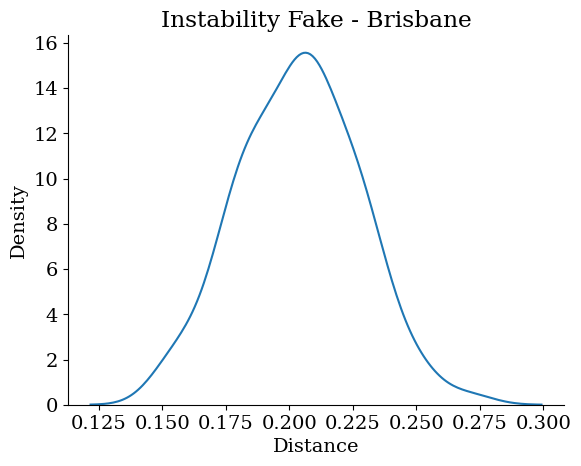

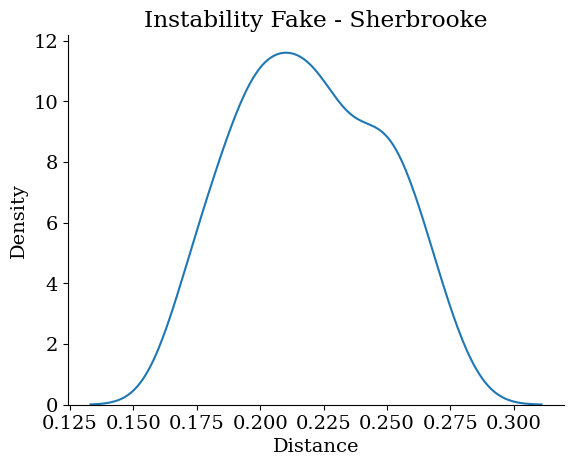

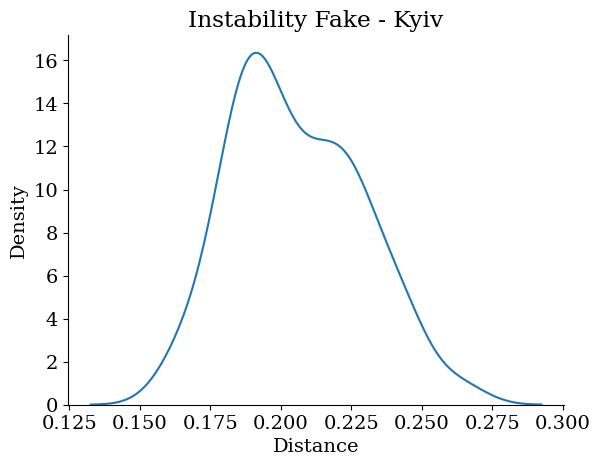

In [ ]:
for i, (backend_name, tab) in enumerate(zip(backend_map.values(), inst_table)):
    sns.kdeplot(tab['dist'])
    # Setto il titolo del grafico alla relativa macchina
    plt.title(f'Instability Fake - {backend_name.capitalize()}')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Distance')
    # Salvo con il nome relativo della macchina
    plt.savefig(f'./results/instability/fake/{folder_name}/instability_{backend_name}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.png')
    # Visualizzo il grafico
    plt.show()

# Risultati Randomness

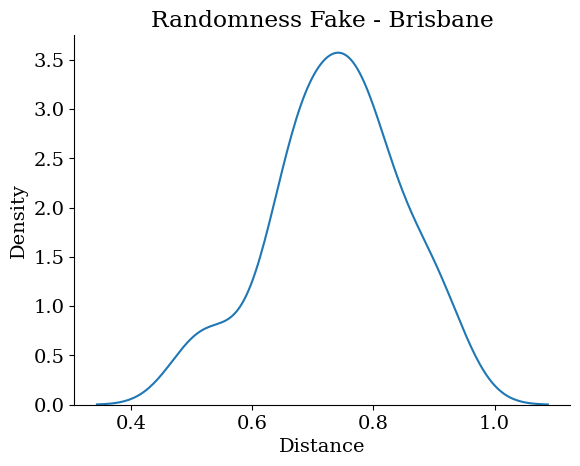

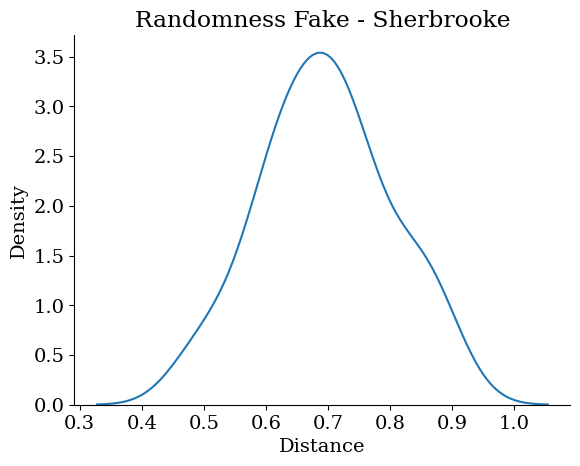

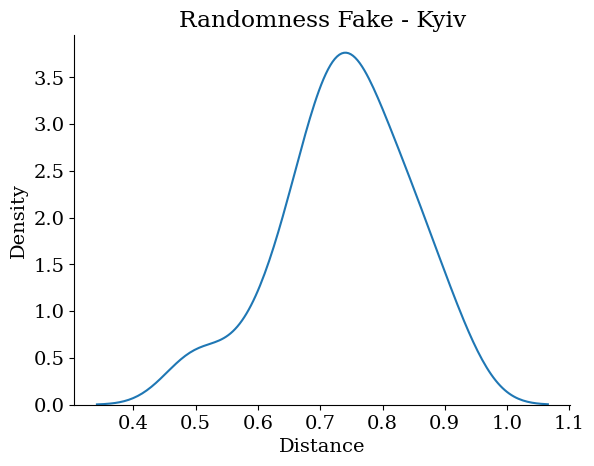

In [ ]:
for i, (backend_name, tab) in enumerate(zip(backend_map.values(), rand_table)):
    sns.kdeplot(tab['dist'])
    plt.title(f'Randomness Fake - {backend_name.capitalize()}')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Distance')
    
    plt.savefig(f'./results/randomness/fake/{folder_name}/randomness_fake_{backend_name}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.png')
    
    plt.show()


# Risultati Uniqueness

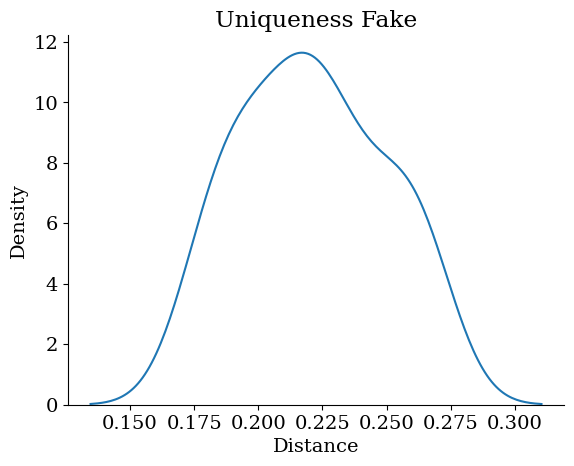

In [ ]:
sns.kdeplot(unique_table['dist'])
plt.title('Uniqueness Fake')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Distance')

plt.savefig(f'./results/uniqueness/fake/{folder_name}/uniqueness_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.png')

plt.show()